In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction to Logistic Regression
In this exercise, you will explore the characteristics of the logistic classifier. 
The figure below shows a schematic of a multivariate logistic regression classifier.
<div class="has-text-centered">
<figure class="image is-inline-block" >

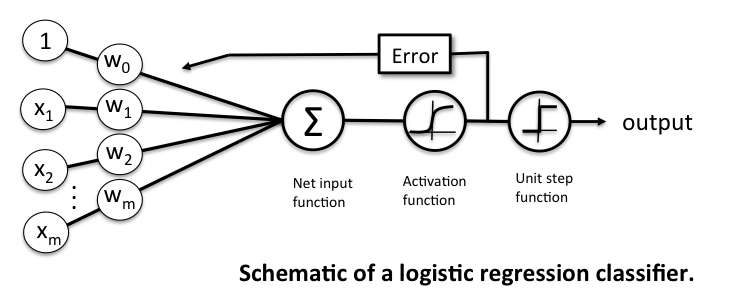


</figure>
</div>
A Logistic regression classifier consists of 3 distinct parts:

1. A multivariate linear function :  $z = \mathbf{w}^\top\mathbf{x} = \sum_i w_i*x_i +b$

2. The sigmoid activation function $\sigma(z)=\frac{1}{1+\text{e}^{(-z)}}$ 

3. A binary step function (thresholding) at $\sigma(z)>0.5$.


## The manual logistic (regression) classifier

---
**Task 1 (medium): Implementing the sigmoid function👩‍💻**
In the following task you will implement and visualize a `sigmoid`
 function along with the decision boundary.
1. Implement the function `sigmoid`
, that given an input `x`
 and the model parameters, returns the output of the sigmoid function.

2. Plot the function values of `sigmoid`
 using `xs`
 as input features.

3. Modify the weight parameter `w`
 of the `sigmoid`
 function. What happens to the function when `w`
:
    - is small? (does it look semilar to another function?)
    - is large? 
    - is zero?


4. How does a change of the bias `b`
 affect the output of `sigmoid`
?

5. Determine the x-values of the decision boundary (x-value where $\sigma(x)=0.5$ ) for the _logistic regression_-classifier. **Hint**: z must be zero in 
$\sigma(z)=\frac{1}{1+\text{e}^{(-z)}}$ for $\sigma=0.5$, hence solve $b + w x = 0$



---

3. We see that w changes the slope of the sigmoid function
    - small: the distance between the lowest value and the highest values becomes large (not so steep slope)
    - large: the distance between the lowest value and the highest values becomes small (very steep slope), starts to resemble a step function (very steep change from 0 to 1)
    - zero: it becomes a straight line
4. The bias term will move the point at which the function hits the value of 0.5
5. Equation solution. We know that $\sigma(0) = 0.5 = \frac{1}{1 + e^{-0}}$ so we need to find $z = 0 = wx + b$ now we can solve for $x$ which is $x = \frac{-b}{w}$

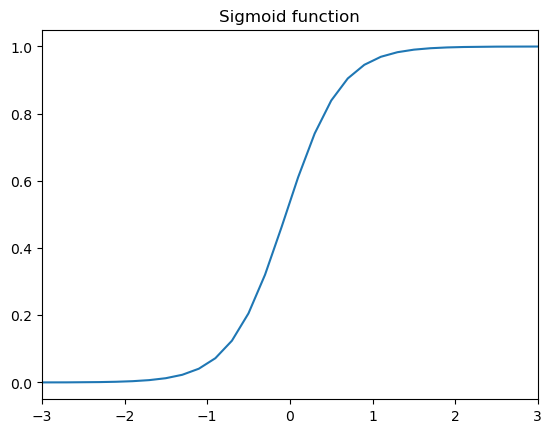

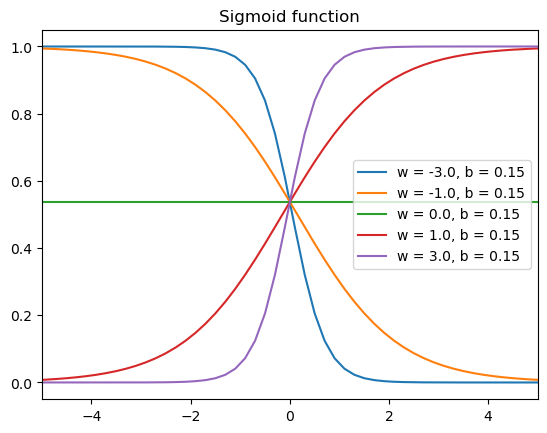

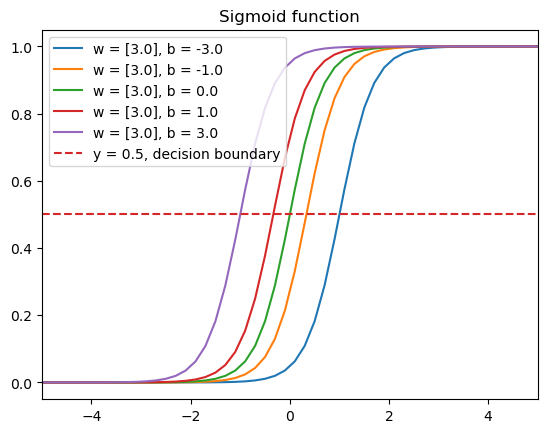

In [30]:
# 1
def sigmoid(x,b,w) :  # sigmoid function
    """
    :param x: 1D array of the (single) input-feature values.
    :param b: The bias parameter of the model.
    :param W: The weight parameter of the model.
    
    :return: output values of the sigmoid function. 
    """
    z = w * x + b
    return 1/(1+np.exp(-z))

xs = np.linspace(-100,100,1000) ### linspace of "input features"
# params = [3.0,0.15] ### parameters of the model
params = [3.0]
b = 0.15

# 2
plt.title('Sigmoid function')
plt.xlim(-3, 3)
s = sigmoid(xs, b, np.array(params)) ### output of the sigmoid function
plt.plot(xs, s, label = f'w = {params[0]}, b = {b}')
plt.show()

# 3
plt.title('Sigmoid function')
plt.xlim(-5, 5)
for w in [-3.0, -1.0, 0.0, 1.0, 3.0]:
    s = sigmoid(xs, b, np.array([w]))
    plt.plot(xs, s, label = f'w = {w}, b = {b}')
plt.legend()
plt.show()

# 4
plt.title('Sigmoid function')
plt.xlim(-5, 5)
for bias in [-3.0, -1.0, 0.0, 1.0, 3.0]:
    s = sigmoid(xs, bias, np.array(params))
    plt.plot(xs, s, label = f'w = {params}, b = {bias}')
# draw a line at 0.5
plt.plot([-5,5],[0.5,0.5],'--C3',label = 'y = 0.5, decision boundary')
plt.legend()
plt.show()

# remove the comment after completing 5.
#plt.plot([Decision_boundary,Decision_boundary],[0,1],'--C3',label = 'decision boundary')

We generate two classes (`class1`
 and `class2`
) of data, drawn from normal distributions (with a different mean and variance)


In [26]:
### 2 classes of randomly generated data

x1= np.random.normal(-50,20,200)
y1 = np.zeros_like(x1)
x2= np.random.normal(50,30,200)
y2 = np.ones_like(x2)

`x1`
 and `x2`
 are the variables for the input features of `class1`
 and `class2`
, respectively. 
Likewise, `y1`
 and `y2`
 are the targets of `class1`
 and `class2`
, respectively. 
The following cell visualizes the data of the classes together with the `sigmoid`
 values and the decision boundary. 


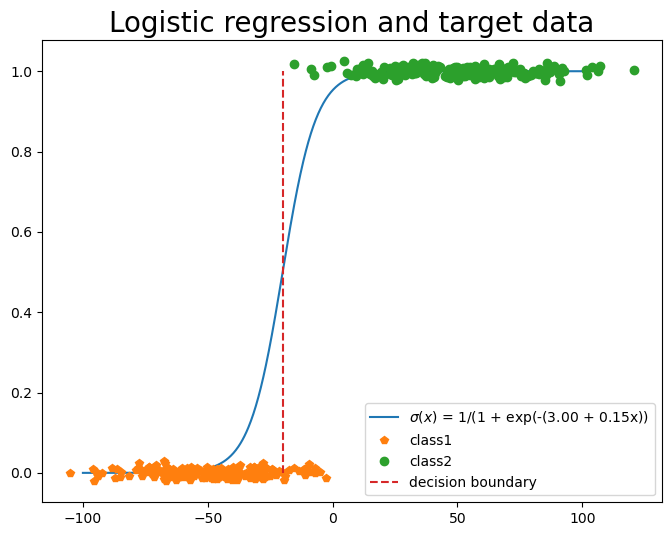

In [36]:
params = [3.0, 0.15]

plt.figure(figsize=(8,6))
plt.plot(xs, sigmoid(xs,params[0],params[1]),label = r"$\sigma(x)$ = 1/(1 + exp(-(%.2f + %.2fx))"%(params[0],params[1]))
plt.plot(x1, y1+np.random.normal(0,0.01,200),'p',label ='class1')
plt.plot(x2, y2+np.random.normal(-0,0.01,200),'o',label = 'class2')
plt.plot([-params[0]/params[1],-params[0]/params[1]],[0,1],'--C3',label = 'decision boundary')

plt.title(r"Logistic regression and target data", fontsize=20)
plt.legend()
plt.show()


---
**Task 2 (medium): The prediction function👩‍💻**
Implement the function `predict`
 in the cell below using `sigmoid`
 to predict the class of data given input-features and model parameters.

---

In [39]:
def predict(x,w):
    """
    :param x: 1D array of the (single) input-feature values.
    :param w: The list of the model parameters, [bias, weight]. 
    
    :return: Boolean array same size as x, where a True values signifies class2, and False signifies class1
    """
    return np.where(sigmoid(x, w[0], w[1]) >= 0.5, True, False)

The cell below visualizes the predictions.


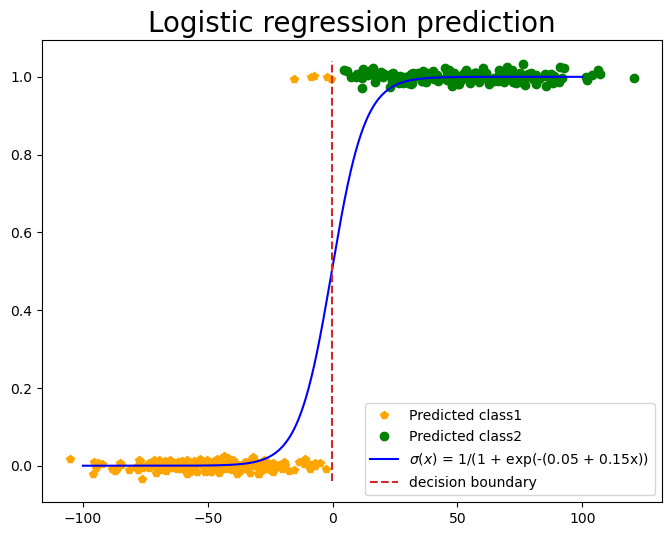

In [50]:
params = [0.05, 0.15]

x_all = np.concatenate([x1,x2])
y_all = np.concatenate([y1+np.random.normal(0,0.01,200),y2+np.random.normal(-0,0.01,200)])
y_bool = predict(x_all,params)
plt.figure(figsize=(8,6))
plt.plot(x_all[~y_bool], y_all[~y_bool],'p',color='orange',label ='Predicted class1')
plt.plot(x_all[y_bool], y_all[y_bool],'go',label = 'Predicted class2')
plt.plot(xs, sigmoid(xs,params[0],params[1]),'b',label = r"$\sigma(x)$ = 1/(1 + exp(-(%.2f + %.2fx))"%(params[0],params[1]))
plt.plot([-params[0]/params[1],-params[0]/params[1]],[-0.04,1.04],'--C3',label = 'decision boundary')
plt.title(r"Logistic regression prediction", fontsize=20)
plt.legend()
plt.show()


---
**Task 3 (medium): Evaluation👩‍💻💡**
1. Which model parameters `w`
 for the logistic classifier best seperate (visually) the two classes?
2. Determine the accuracy (fraction of correct predictions) of the classifier. 


**Tip**
You can use the accuracy function from the previous exercise.


---

1. It seems like a smaller value of w gives a better separation of the two classes
2. See below

In [54]:
# 2
def accuracy(predictions,targets):
    """
    :param predictions: 1D-array of predicted classes for the data.
    :param targets: 1D-array of actual classes for the data.
     
    :return: fraction of correctly predicted points (num_correct/num_points).
    """
    filtered_predictions = list(filter(lambda p: p == targets[0], predictions))

    return len(filtered_predictions) / len(targets)

x1_predictions = predict(x1, params)
x2_predictions = predict(x2, params)
x1_accuracy = accuracy(x1_predictions, y1)
x2_accuracy = accuracy(x2_predictions, y2)

print(f'Accuracy for class 1: {x1_accuracy}, class 2: {x2_accuracy}')

Accuracy for class 1: 1.0, class 2: 0.975



---
**Task 4 (medium): Increasing input dimensions _(optional)_👩‍💻**
In this task the logistic regression function is modified to take 2 features as input (x,y).
1. Modify `sigmoid`
 such that it can take a tuple of two 1D-array variables as input.
2. Make a 3D-plot of the 2-variable sigmoid function. 
**Tip**
Use a meshgrid


3. Plot the decision boundary plane 
**Tip**
the plane where $z\in[0,1]$ and x,y such that $ b + w_1*x+w_2*y = 0 $ (why is this?)




---

In [ ]:
def sigmoid2D(X,params) :  # sigmoid function
    """
    :param X: tuple of input features (x,y).
    :param parametes: List of the model parameters.
    :return: output values of the sigmoid function. 
    """
    # Write solutions here
    ...

# Write your code for the 3D plot here.

Identically to above, we generate 2 classes (`class1`
 and `class2`
), but this time with two input features. 


In [ ]:
S = 100*np.eye(2)
p1,q1 = np.random.multivariate_normal([20,8], S, 200).T
p2,q2 = np.random.multivariate_normal([-10,-13], S, 200).T

z1 = np.ones_like(q1)+np.random.normal(0,0.01,200)
z2 = np.zeros_like(q2)+np.random.normal(0,0.01,200)


---
**Task 5 (medium): 2D Extra _(optional)_👩‍💻💡**
1. Implement `predict2D`
, that can predict the binary class of the 2D data input. 
2. Use `predict2D`
 to determine the accuracy of the logistic classifier. 
3. Manually choose parameters that have an accuracy above $80\%$


---

In [ ]:
def predict2D(X,params):
    """
    :param x: tuple of 1D arrays of the input-feature values.
    :param params: The list of the model parameters, [bias, weight1, weight2]. 
    
    :return: Boolean array same size as x, where a True values signifies class2, and False signifies class1
    """
    ...
#### Plotting

# Code you solution here


---
**Task 6 (medium): Reflection and plot 2D _(optional)_👩‍💻💡**
1. Plot the generated data together with the 2D input logistic function and decision boundary.
2. Make a 2D projection plot in the XY plane of the decision boundary and the data points. Plot class 1 as blue and class 2 as red. 
**Tip**
Ignore the z-dimension.


3. Consider the last exercise on decision boundaries: are there any similarities between the linear descision boundary and the current 2D projection plot?


---

In [ ]:
# Plotting data point along with the sigmoid
# Write your code for the 3D plot here.